In [1]:
!pip install pandas
!pip install scikit-learn matplotlib seaborn


import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data = pd.read_csv("C:/Users/kamit/OneDrive/Desktop/ATTEN/Dataset/internal_marks.csv")
data.head()

,ST1,ST2,PUT,Attendance (%),Weighted Score,Internal Mark
0,8,23,38,16,29.40,22.26
1,2,6,33,39,23.25,20.74
2,1,45,63,89,51.40,27.69
3,12,39,36,26,32.50,23.02
4,17,24,67,47,49.90,27.32


In [3]:
data.describe()

,ST1,ST2,PUT,Attendance (%),Weighted Score,Internal Mark
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,12.316667,25.400000,33.413333,49.753333,29.463167,22.274867
std,7.390882,14.516281,20.867054,29.535068,13.044360,3.220646
min,0.000000,0.000000,0.000000,0.000000,2.950000,15.730000
25%,5.750000,13.000000,15.000000,20.750000,18.637500,19.597500
50%,12.000000,24.000000,32.500000,47.000000,29.050000,22.170000
75%,19.000000,38.000000,52.250000,77.000000,39.650000,24.792500
max,25.000000,50.000000,70.000000,100.000000,58.300000,29.400000


In [4]:
data.isnull().sum()

ST1               0
ST2               0
PUT               0
Attendance (%)    0
Weighted Score    0
Internal Mark     0
dtype: int64

<Axes: >

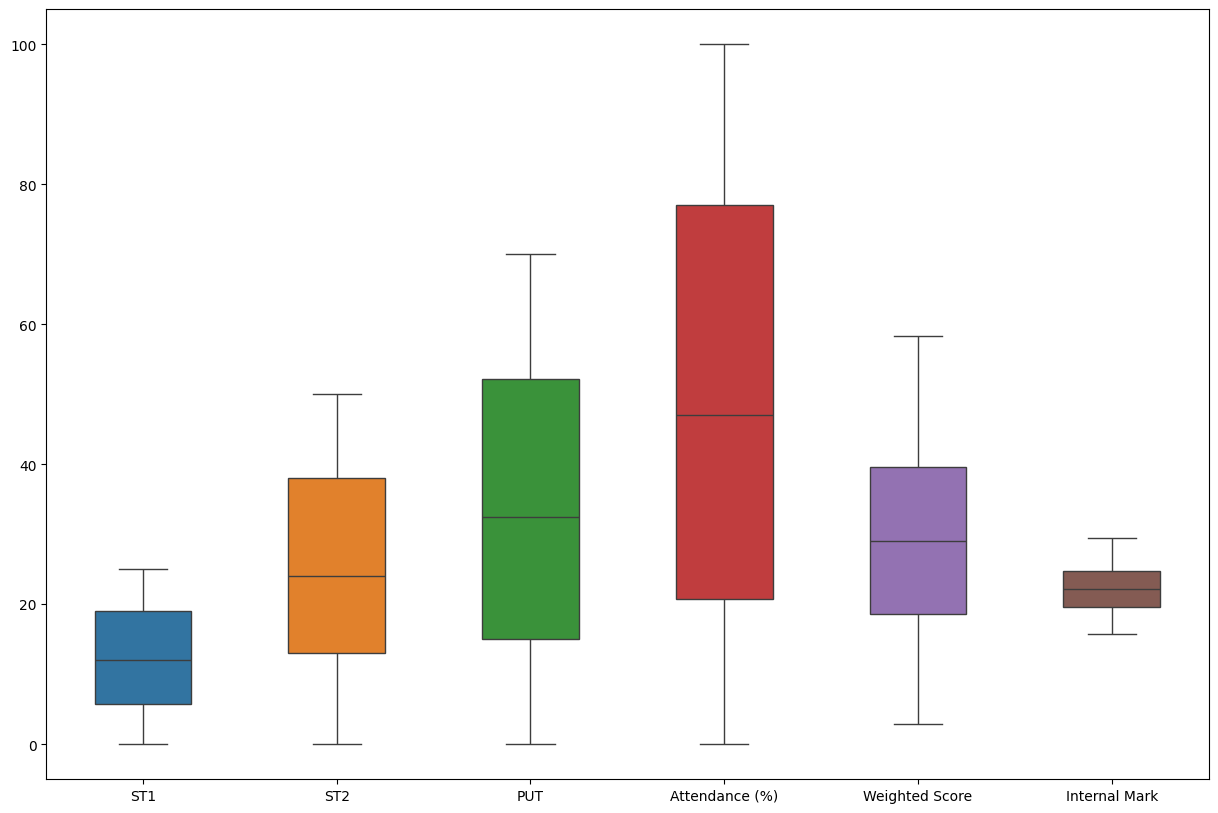

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [6]:
X = data.drop(columns = ['Internal Mark','Weighted Score'])
y = data['Internal Mark']

In [8]:
X,y

(     ST1  ST2  PUT  Attendance (%)
 0      8   23   38              16
 1      2    6   33              39
 2      1   45   63              89
 3     12   39   36              26
 4     17   24   67              47
 ..   ...  ...  ...             ...
 295   24    7   20               3
 296    6   38   16              11
 297   20   14   27              85
 298   13   10   28              71
 299    0   32   31              35
 
 [300 rows x 4 columns],
 0      22.26
 1      20.74
 2      27.69
 3      23.02
 4      27.32
        ...  
 295    19.23
 296    19.60
 297    21.48
 298    21.00
 299    21.60
 Name: Internal Mark, Length: 300, dtype: float64)

In [9]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((225, 4), (75, 4))

In [10]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('C:/Users/kamit/OneDrive/Desktop/ATTEN/Model/standardScalar.pkl','wb')
    
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled
# C:\Users\kamit\OneDrive\Desktop\ALTMAN\Model
#path = "C:/Users/kamit/OneDrive/Desktop/ALTMAN/Model"
'#/workspaces/python/Model/standardScalar.pkl','wb'

('#/workspaces/python/Model/standardScalar.pkl', 'wb')

In [11]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [12]:
X_train_scaled

array([[-1.3463258 , -0.50297245,  0.90637989, -1.52805508],
       [-1.47988987,  0.81053226,  0.38984979, -0.4033714 ],
       [ 1.19139148, -1.05602706,  0.06114882, -0.23296478],
       [-0.9456336 ,  0.32660948, -1.58235605,  0.38049905],
       [-1.21276173, -0.15731331,  0.34289251,  0.61906831],
       [-1.3463258 ,  0.32660948,  1.18812358,  1.64150802],
       [ 0.39000708, -0.08818149, -1.44148421,  0.21009243],
       [-0.67850546, -1.05602706, -0.87799682,  1.0280442 ],
       [-0.01068513, -0.43384062,  0.81246533, -0.30112743],
       [ 0.39000708,  0.05008217, -1.44148421,  0.92580022],
       [-0.14424919,  1.29445505,  1.37595271, -0.4033714 ],
       [ 1.32495555, -1.19429072,  0.34289251,  0.95988155],
       [-0.5449414 , -0.98689524,  0.85942261,  0.21009243],
       [-1.3463258 , -0.22644514,  0.90637989, -0.50561537],
       [ 0.12287894,  0.87966409,  1.32899543, -1.28948582],
       [ 0.92426335, -1.60908168, -0.03276575, -0.33520875],
       [-0.01068513,  0.

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [17]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
regression.coef_

array([0.27742497, 0.71411423, 3.15481978, 0.36189949])

In [19]:
regression.intercept_

np.float64(22.315244444444446)

In [22]:
y_pred_test= regression.predict(X_test_scaled)
y_pred_test

array([19.975717  , 15.72893742, 20.82723109, 23.14793362, 19.71679249,
       19.86356946, 26.2098212 , 25.49325682, 22.87649689, 24.24655254,
       23.43242157, 22.30816842, 16.65484823, 20.43166613, 19.40771074,
       21.88859886, 19.33348457, 26.34538564, 24.98733276, 26.96214683,
       26.58016066, 22.45686851, 19.22260295, 25.83856122, 20.55575476,
       17.29670566, 22.34569682, 27.76425266, 22.87684336, 19.23548287,
       19.77768755, 18.46926029, 21.34567974, 19.87599488, 21.45655164,
       22.55587815, 20.01200038, 25.40641   , 21.60463503, 21.49381908,
       17.56792985, 20.12369432, 27.85114645, 24.57961209, 23.17288413,
       22.83904085, 21.76517053, 18.46896276, 15.86513124, 20.95035931,
       27.91327781, 25.72872798, 20.97505369, 25.66630335, 19.80260586,
       23.93853479, 18.66619343, 27.53000293, 21.11085403, 18.98722352,
       24.71585794, 25.81521456, 20.13592829, 24.77733643, 22.6662923 ,
       21.96258592, 25.7405976 , 26.30843056, 23.81505925, 21.56

In [23]:
##performance matrix cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

9.946159908093588e-06
0.0028017760696032925
0.0031537533048882544


In [24]:
## r Square andAdjusted R Square

from sklearn.metrics import r2_score
score =r2_score(y_test,y_pred_test)
print(score)


0.9999988706028952


In [25]:
import pickle
file = open('C:/Users/kamit/OneDrive/Desktop/ATTEN/Model/modelForPrediction.pkl','wb')
##/workspaces/python/Model
pickle.dump(regression,file)
file.close()